# Chuẩn hoá dữ liệu với Min-Max Scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,55.868085,32.749588,11.737528,17.402375,19.792606
1,57.727049,13.217565,8.648717,34.601356,23.100011
2,50.802328,2.177992,9.622978,32.032756,22.412197
3,38.110248,28.474239,8.489243,4.904654,22.871539
4,49.682749,2.527563,9.572832,15.370168,23.438676


## Trực quan hóa dữ liệu sinh ra

<AxesSubplot:ylabel='Density'>

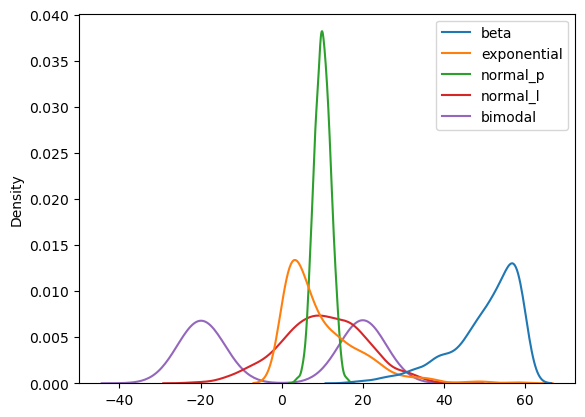

In [5]:
sns.kdeplot(data = df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.254018,9.736457,10.055720,10.229844,0.079518
std,8.499938,9.292592,2.013482,10.245739,20.103003
min,17.227075,0.057026,3.396812,-21.467476,-29.226617
25%,46.392769,2.832998,8.631001,3.477309,-19.965069
50%,52.639395,6.705807,10.031425,10.300714,-0.557892
75%,56.933281,14.163126,11.430695,17.404315,20.120579
max,59.993674,59.804739,16.330743,41.975251,29.483857


## Thêm một đặc trưng với giá trị lớn hơn nhiều

<AxesSubplot:ylabel='Density'>

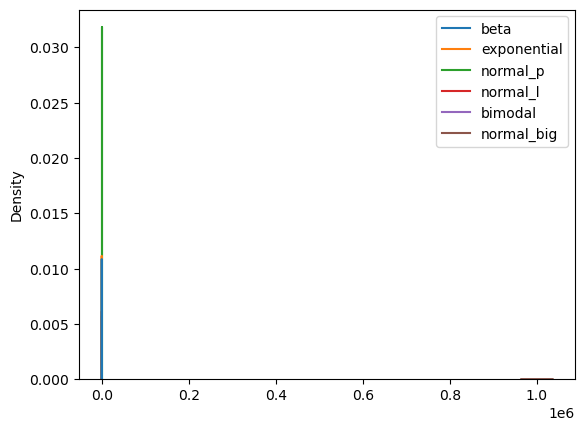

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

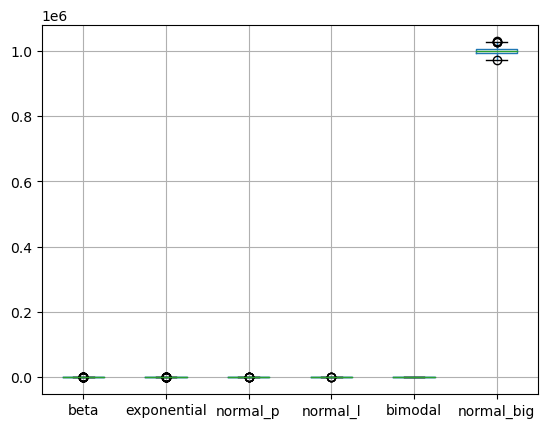

In [8]:
df.boxplot()

## Chuẩn hóa với Min-Max scaling

In [9]:
scaler = MinMaxScaler()

In [10]:
df_s = scaler.fit_transform(df)
col_names = list(df.columns)
df_s = pd.DataFrame(df_s, columns = col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.903532,0.547177,0.644871,0.612676,0.834931,0.428407
1,0.947000,0.220268,0.406056,0.883771,0.891266,0.423472
2,0.785081,0.035499,0.481382,0.843284,0.879550,0.394972
3,0.488306,0.475620,0.393726,0.415684,0.887374,0.674596
4,0.758902,0.041349,0.477505,0.580644,0.897034,0.955750


<AxesSubplot:ylabel='Density'>

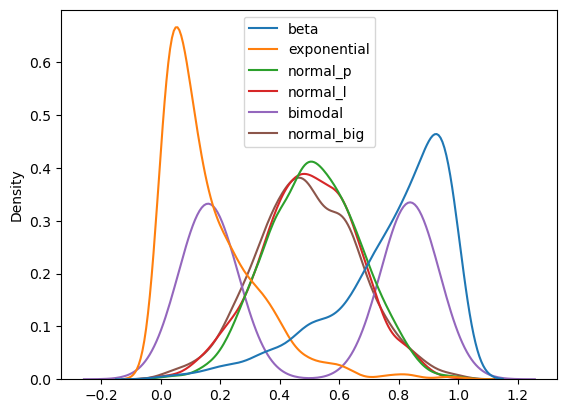

In [12]:
sns.kdeplot(df_s)

<AxesSubplot:>

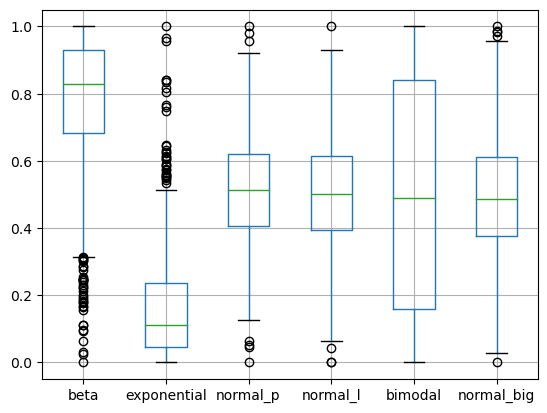

In [13]:
df_s.boxplot()

In [14]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.772260,0.162005,0.514840,0.499621,0.499164,0.493314
std,0.198752,0.155531,0.155674,0.161496,0.342409,0.170854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.681974,0.046462,0.404687,0.393186,0.157749,0.375915
50%,0.828037,0.111281,0.512962,0.500738,0.488307,0.486352
75%,0.928440,0.236094,0.621148,0.612707,0.840518,0.612308
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# lấy giá trị min của cột beta
df_s["beta"].min()

0.0

In [16]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [17]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[17.22707505178917,
 0.0570264353960304,
 3.3968118126700197,
 -21.467475566313023,
 -29.226616822974773,
 971886.6408738424]

In [18]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [19]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.99367408251779,
 59.80473943522295,
 16.330742788372064,
 41.975251415688135,
 29.483856975747187,
 1029174.502650215]

In [20]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0]